In [1]:
#### Name : Nithish Kannen S
#### Roll Number: 18EE30016

#Imports
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)
test_dataset = datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
### This is the DataLoader which is a class that loads the Dataset in Batches of Fixed size
### This helps us to Forward Propogate and Backporogate a fixed number of training samples at a time
train_loader_256 = DataLoader(dataset = train_dataset, batch_size = 256, shuffle = True)
train_loader_128 = DataLoader(dataset = train_dataset, batch_size = 128, shuffle = True)
train_loader_64 = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)


In [4]:
##Thought the batch size of test dataset wont make a difference, it is there for memory issues
test_loader = DataLoader(dataset = test_dataset, batch_size = 256, shuffle = True)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
print("Number of Train datapoints: {}".format(str(len(train_loader_64.dataset))))
print("Number of Test datapoints: {}".format(str(len(test_loader.dataset))))

Number of Train datapoints: 60000
Number of Test datapoints: 10000


In [7]:
class FullyConnected(nn.Module):
    
    """
    This is the Neural Network Class:
    No. of hidden layers = 1
    •No. of neurons in the hidden layer1= 100
    •Activation function of hidden layer: Sigmoid function
    •No. of neurons in the output layer = 10
    •Activation function in output layer: SoftMaxfunction•Input: MNIST data (28*28)
    Instantiating and object of this class will help us to train a Neural Network
    """
    
    def __init__(self, input_size, hidden_size, output_size):
        """
        This is the constructor, that initalises the Different Layers of the Neural Network
        Instance with the specified values passes as params
        args: input_size: # of neurons of input layer
              hidden_size:  # of neurons of hidden layer 
              output_size: # of neurons of outptu layer
        """
        super(FullyConnected, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        """
        Function to feedward the input
        args: x : input
        returns output
        """
        
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = (self.fc2(x))
        
        return x
        

In [20]:
learning_rate1 = 0.025
learning_rate2 = 0.05
learning_rate3 = 0.1
learning_rate4 = 0.2
learning_rate5 =  0.5

In [8]:
def test_accuracy(model, loader, flag, test):
    """
    This function tests accuarcy for a given model, the parameters decide if it is for the training or the
    testing data
    It returns the Percentage accuracy of the Given Model for the given data

    """
    data = 60000
    if(test):
      data = 10000
    correct_pred = 0

    for X, y in loader:

        X = X.to(device)
        y = y.to(device)
        X = X.view(X.shape[0], -1)
        logits = model.forward(X)
        predictions = torch.argmax(logits, dim = 1)
        correct_pred += torch.sum(predictions == y)

    return correct_pred/data*100
 


   


In [28]:
def test_loss(model, loader, flag, test):
    """
    This function tests loss for a given model, the parameters decide if it is for the training or the
    testing data
    It returns the Loss per Batch of the Given Model for the given data

    """
    data = 60000
    if(test):
      data = 10000
    running_loss = 0
    
    for batch_index, (X, y) in enumerate(loader):

        X = X.to(device)
        y = y.to(device)
        X = X.view(X.shape[0], -1)
        logits = model.forward(X)
        predictions = torch.argmax(logits, dim = 1)
        running_loss += loss(logits, y)

    


    return running_loss/(batch_index + 1)

## Question **3**

In [29]:
### This Cell is the Training Cell, we use the SGD Optimizer and train the Network for 50 Epochs
### Learning Rate = 0.5, Batch Size = 64

input_size = 784
hidden_size = 100
output_size = 10
model = FullyConnected(input_size, hidden_size, output_size).to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr = learning_rate5,  momentum=0.9 )
EPOCHS = 50
train_loss =  []
train_acc = []
test_acc = []
test_losses = []

print(" Batch Size = 64 \n")

for epoch in range(EPOCHS):
    

    running_loss = 0
    correct_predictions = 0
    
    for batch_index, (image_data, classes) in enumerate(train_loader_64):
        
        X = image_data.to(device)
        y = classes.to(device)
        
        X = X.view(X.shape[0], -1)  ## do this for the FCC part
        
        logits = model.forward(X)
        
        predictions = torch.argmax(logits, dim = 1)
        
        running_loss += loss(logits, y)
        
        #print(classes)
        correct_predictions += torch.sum(predictions == y)
        
        optimizer.zero_grad()
        
    totalLoss = running_loss/(batch_index + 1)
    
    totalLoss.backward()
    
    optimizer.step()
    
    epoch_loss = running_loss.item()/(batch_index + 1)
    epoch_acc = correct_predictions/(60000)
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_acc.append(test_accuracy(model, test_loader, 0, True).item())
    test_losses.append(test_loss(model, test_loader, 0, True).item())
    
    print("Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%... TestLoss : {:.4f} ".format(epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0, True).item(), (test_loss(model, test_loader, 0, True).item())))

 Batch Size = 64 

Epoch: 1 ........... Training Accuracy: 10.1933%.....Training Loss: 2.3293.....Test Accuracy : 11.3500%... TestLoss : 2.2910 
Epoch: 2 ........... Training Accuracy: 11.2383%.....Training Loss: 2.2929.....Test Accuracy : 13.9200%... TestLoss : 2.2937 
Epoch: 3 ........... Training Accuracy: 14.0100%.....Training Loss: 2.2943.....Test Accuracy : 35.8500%... TestLoss : 2.2317 
Epoch: 4 ........... Training Accuracy: 35.2183%.....Training Loss: 2.2345.....Test Accuracy : 24.7900%... TestLoss : 2.1919 
Epoch: 5 ........... Training Accuracy: 24.1017%.....Training Loss: 2.1937.....Test Accuracy : 38.2900%... TestLoss : 2.1361 
Epoch: 6 ........... Training Accuracy: 37.2717%.....Training Loss: 2.1401.....Test Accuracy : 53.5800%... TestLoss : 2.0438 
Epoch: 7 ........... Training Accuracy: 52.0483%.....Training Loss: 2.0503.....Test Accuracy : 53.3200%... TestLoss : 1.9578 
Epoch: 8 ........... Training Accuracy: 52.3583%.....Training Loss: 1.9672.....Test Accuracy : 68.4

Model Prediction is tensor(6)


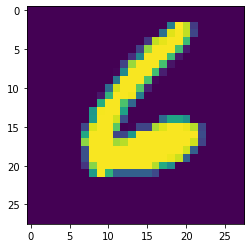

In [51]:
a = iter(test_loader).next()
plt.imshow(a[0][56].reshape(28, 28))
logits = a[1][56]
a = a[0][56].to(device)
a = a.reshape(1, 1, 28, 28)

predictions = logits

print("Model Prediction is", predictions)


## Question 4

In [34]:
print("Training Accuracy : {}".format(train_acc[49].item()))
print("Test Accuracy : {}".format(test_acc[49]))
print("Training Loss : {}".format(train_loss[49]))
print("Testing Loss : {}".format(test_losses[49]))

Training Accuracy : 0.9036000370979309
Test Accuracy : 90.7699966430664
Training Loss : 0.3269557342854644
Testing Loss : 0.3126557767391205


## Question **5**

Text(0, 0.5, 'Loss')

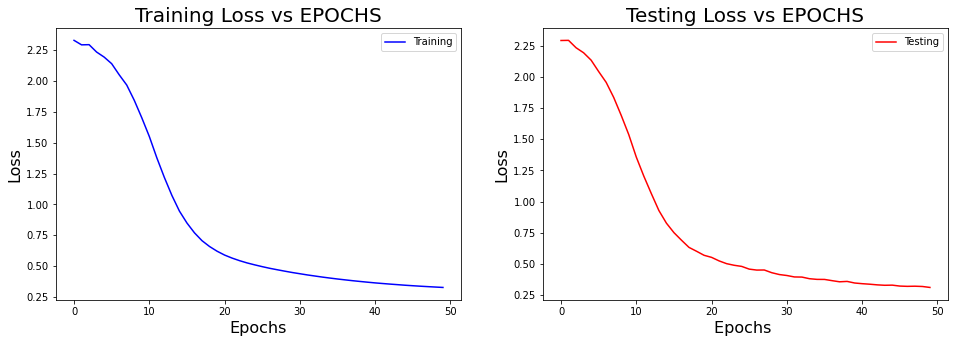

In [38]:
fig = plt.figure(figsize = (16, 5)) 
    #plt.title("Learning Rate = 0.1",  fontsize = 20,fontname="Times New Roman Bold")
plt.subplot(121)
plt.plot( range(EPOCHS), train_loss,'b-',label='Training') 
plt.legend()
plt.title("Training Loss vs EPOCHS", fontsize = 20,fontname="Times New Roman Bold")
plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.subplot(122)
plt.plot(range(EPOCHS), test_losses,'r-',label='Testing') 
plt.legend()
plt.title("Testing Loss vs EPOCHS", fontsize = 20,fontname="Times New Roman Bold")
plt.xlabel('Epochs ',fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

# **Question 6 A - Deciding Batch Size**

a)

Batch size = 256

I have separately trained and tested the Data for Different Batch sizes,
We consder 3 batch Sizes, 256, 128 and 64

In [50]:
TestAcc = []
TrainAcc = []

In [41]:

input_size = 784
hidden_size = 100
output_size = 10
model = FullyConnected(input_size, hidden_size, output_size).to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr = learning_rate3,  momentum=0.9 )
EPOCHS = 50
train_loss =  []
train_acc = []
test_acc = []

print(" Batch Size = 256 \n")

for epoch in range(EPOCHS):
    

    running_loss = 0
    correct_predictions = 0
    
    for batch_index, (image_data, classes) in enumerate(train_loader_256):
        
        X = image_data.to(device)
        y = classes.to(device)
        
        X = X.view(X.shape[0], -1)  ## do this for the FCC part
        
        logits = model.forward(X)
        
        predictions = torch.argmax(logits, dim = 1)
        
        running_loss += loss(logits, y)
        
        #print(classes)
        correct_predictions += torch.sum(predictions == y)
        
        optimizer.zero_grad()
        
    totalLoss = running_loss/(batch_index + 1)
    
    totalLoss.backward()
    
    optimizer.step()
    
    epoch_loss = running_loss.item()/(batch_index + 1)
    epoch_acc = correct_predictions/(60000)
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_acc.append(test_accuracy(model, test_loader, 0, True).item())
    
    print("Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%".format(epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0,True).item()))

 Batch Size = 256 

Epoch: 1 ........... Training Accuracy: 9.8633%.....Training Loss: 2.3508.....Test Accuracy : 9.5800%
Epoch: 2 ........... Training Accuracy: 9.8633%.....Training Loss: 2.3255.....Test Accuracy : 10.7300%
Epoch: 3 ........... Training Accuracy: 11.0917%.....Training Loss: 2.2997.....Test Accuracy : 11.4300%
Epoch: 4 ........... Training Accuracy: 11.3567%.....Training Loss: 2.2903.....Test Accuracy : 11.3500%
Epoch: 5 ........... Training Accuracy: 11.2367%.....Training Loss: 2.2937.....Test Accuracy : 11.3500%
Epoch: 6 ........... Training Accuracy: 11.2367%.....Training Loss: 2.2943.....Test Accuracy : 11.3500%
Epoch: 7 ........... Training Accuracy: 11.2367%.....Training Loss: 2.2795.....Test Accuracy : 12.3800%
Epoch: 8 ........... Training Accuracy: 12.2317%.....Training Loss: 2.2529.....Test Accuracy : 40.1000%
Epoch: 9 ........... Training Accuracy: 38.9733%.....Training Loss: 2.2272.....Test Accuracy : 59.7200%
Epoch: 10 ........... Training Accuracy: 59.988

In [11]:
def visualise(EPOCHS, train_loss, train_acc, test_acc, batch_size): 

    print("Batch Size : ", batch_size)
    fig = plt.figure(figsize = (19, 4)) 
    plt.title("Learning Rate = 0.1",  fontsize = 20,fontname="Times New Roman Bold")
    plt.subplot(131)
    plt.plot(range(EPOCHS),train_loss,'r-',label='Loss/error') 
    plt.legend(loc='upper right')
    plt.title("Training Loss vs Epoch", fontsize = 20,fontname="Times New Roman Bold")
    plt.xlabel('Epochs', fontsize = 16)
    plt.ylabel('Loss', fontsize = 16)
    
    plt.subplot(132)
    plt.plot(range(EPOCHS),train_acc,'g-',label='Accuracy') 
    plt.legend()
    plt.title("Training Accuracy vs Epoch", fontsize = 20,fontname="Times New Roman Bold")
    plt.xlabel('Epochs',fontsize = 16)
    plt.ylabel('Acc', fontsize = 16)

    plt.subplot(133)
    plt.plot(range(EPOCHS),test_acc,'b-',label='Accuracy') 
    plt.legend()
    plt.title("Testing Accuracy vs Epoch", fontsize = 20,fontname="Times New Roman Bold")
    plt.xlabel('Epochs',fontsize = 16)
    plt.ylabel('Acc', fontsize = 16)

Bathc Size = 256


Text(0, 0.5, 'Acc')

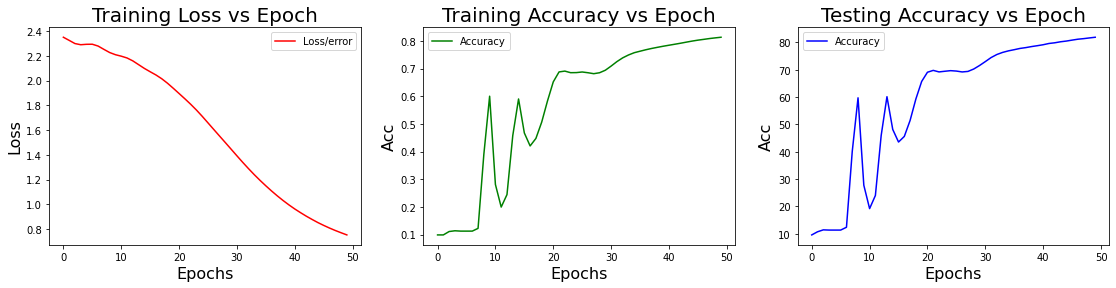

In [44]:

visualise(EPOCHS, train_loss, train_acc, test_acc, 256)

In [51]:

TestAcc.append(test_accuracy(model, test_loader, 0, True).item())
TrainAcc.append(test_accuracy(model, train_loader_256, 0, False).item())
print("Batch Size = 256\n")
print(" Testing Accuracy: {:.4f}%   :   Training Accuracy: {:.4f}% ".format(test_accuracy(model, test_loader, 0, True).item(), test_accuracy(model, train_loader_256, 0, False).item()))

Batch Size = 256

 Testing Accuracy: 81.8700%   :   Training Accuracy: 81.5217% 


**Batch size = 128**

In [55]:
input_size = 784
hidden_size = 100
output_size = 10
model = FullyConnected(input_size, hidden_size, output_size).to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr = learning_rate3,  momentum=0.9 )
EPOCHS = 50
train_loss =  []
train_acc = []
test_acc = []

print(" Batch Size = 128 \n")

for epoch in range(EPOCHS):
    

    running_loss = 0
    correct_predictions = 0
    
    for batch_index, (image_data, classes) in enumerate(train_loader_128):
        
        X = image_data.to(device)
        y = classes.to(device)
        
        X = X.view(X.shape[0], -1)  ## do this for the FCC part
        
        logits = model.forward(X)
        
        predictions = torch.argmax(logits, dim = 1)
        
        running_loss += loss(logits, y)
        
        #print(classes)
        correct_predictions += torch.sum(predictions == y)
        
        optimizer.zero_grad()
        
    totalLoss = running_loss/(batch_index + 1)
    
    totalLoss.backward()
    
    optimizer.step()
    
    epoch_loss = running_loss.item()/(batch_index + 1)
    epoch_acc = correct_predictions/(60000)
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_acc.append(test_accuracy(model, test_loader, 0, True).item())
    
    print("Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%".format(epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0 ,True).item()))

 Batch Size = 128 

Epoch: 1 ........... Training Accuracy: 9.9000%.....Training Loss: 2.3328.....Test Accuracy : 9.6800%
Epoch: 2 ........... Training Accuracy: 9.3783%.....Training Loss: 2.3176.....Test Accuracy : 8.9800%
Epoch: 3 ........... Training Accuracy: 8.5450%.....Training Loss: 2.3011.....Test Accuracy : 11.3800%
Epoch: 4 ........... Training Accuracy: 11.2433%.....Training Loss: 2.2933.....Test Accuracy : 17.7800%
Epoch: 5 ........... Training Accuracy: 17.7117%.....Training Loss: 2.2918.....Test Accuracy : 31.0300%
Epoch: 6 ........... Training Accuracy: 30.4883%.....Training Loss: 2.2881.....Test Accuracy : 35.5400%
Epoch: 7 ........... Training Accuracy: 35.0767%.....Training Loss: 2.2762.....Test Accuracy : 36.3600%
Epoch: 8 ........... Training Accuracy: 35.9833%.....Training Loss: 2.2571.....Test Accuracy : 35.2700%
Epoch: 9 ........... Training Accuracy: 34.8650%.....Training Loss: 2.2368.....Test Accuracy : 48.4100%
Epoch: 10 ........... Training Accuracy: 46.9933%

Batch Size :  128


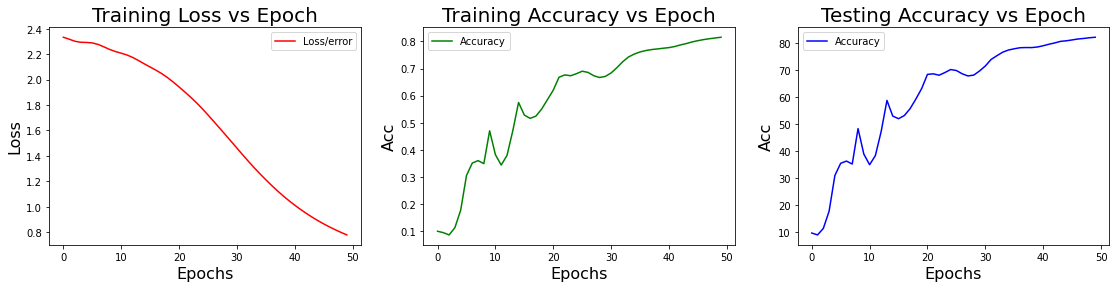

In [57]:
visualise(EPOCHS, train_loss, train_acc, test_acc, 128)

In [58]:
TestAcc.append(test_accuracy(model, test_loader, 0, True).item())
TrainAcc.append(test_accuracy(model, train_loader_256, 0, False).item())
print("Batch Size = 128\n")
print(" Testing Accuracy: {:.4f}%   :   Training Accuracy: {:.4f}% ".format(test_accuracy(model, test_loader, 0, True).item(), test_accuracy(model, train_loader_256, 0, False).item()))

Batch Size = 128

 Testing Accuracy: 82.2800%   :   Training Accuracy: 81.6733% 


Batch Size = 64

In [59]:
input_size = 784
hidden_size = 100
output_size = 10
model = FullyConnected(input_size, hidden_size, output_size).to(device)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD( model.parameters(), lr = learning_rate3,  momentum=0.9 )
EPOCHS = 50
train_loss =  []
train_acc = []
test_acc = []

print(" Batch Size = 64 \n")

for epoch in range(EPOCHS):
    

    running_loss = 0
    correct_predictions = 0
    
    for batch_index, (image_data, classes) in enumerate(train_loader_64):
        
        X = image_data.to(device)
        y = classes.to(device)
        
        X = X.view(X.shape[0], -1)  ## do this for the FCC part
        
        logits = model.forward(X)
        
        predictions = torch.argmax(logits, dim = 1)
        
        running_loss += loss(logits, y)
        
        #print(classes)
        correct_predictions += torch.sum(predictions == y)
        
        optimizer.zero_grad()
        
    totalLoss = running_loss/(batch_index + 1)
    
    totalLoss.backward()
    
    optimizer.step()
    
    epoch_loss = running_loss.item()/(batch_index + 1)
    epoch_acc = correct_predictions/(60000)
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_acc.append(test_accuracy(model, test_loader, 0, True).item())
    
    print("Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%".format(epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0 ,True).item()))

 Batch Size = 64 

Epoch: 1 ........... Training Accuracy: 11.2450%.....Training Loss: 2.3280.....Test Accuracy : 11.3500%
Epoch: 2 ........... Training Accuracy: 11.2450%.....Training Loss: 2.3111.....Test Accuracy : 11.3600%
Epoch: 3 ........... Training Accuracy: 11.2517%.....Training Loss: 2.2938.....Test Accuracy : 17.6300%
Epoch: 4 ........... Training Accuracy: 17.7217%.....Training Loss: 2.2866.....Test Accuracy : 10.2800%
Epoch: 5 ........... Training Accuracy: 10.4433%.....Training Loss: 2.2863.....Test Accuracy : 10.2800%
Epoch: 6 ........... Training Accuracy: 10.4417%.....Training Loss: 2.2823.....Test Accuracy : 10.2800%
Epoch: 7 ........... Training Accuracy: 10.4417%.....Training Loss: 2.2682.....Test Accuracy : 12.4400%
Epoch: 8 ........... Training Accuracy: 12.3067%.....Training Loss: 2.2468.....Test Accuracy : 36.6100%
Epoch: 9 ........... Training Accuracy: 36.7067%.....Training Loss: 2.2262.....Test Accuracy : 21.3700%
Epoch: 10 ........... Training Accuracy: 20.6

Batch Size :  64


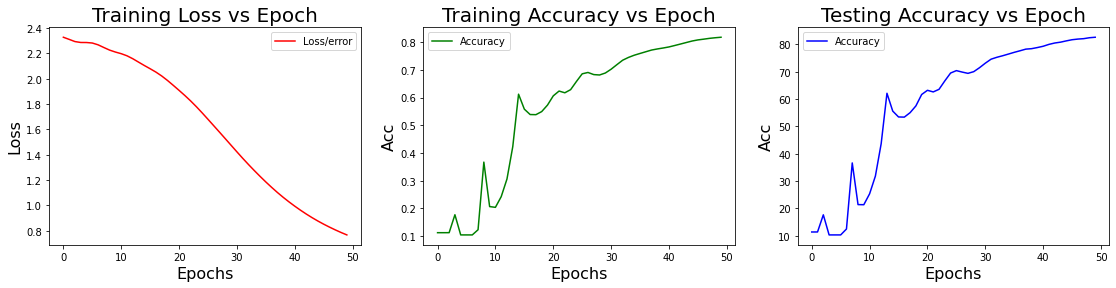

In [60]:
visualise(EPOCHS, train_loss, train_acc, test_acc, 64)

In [61]:
TestAcc.append(test_accuracy(model, test_loader, 0, True).item())
TrainAcc.append(test_accuracy(model, train_loader_256, 0, False).item())
print("Batch Size = 64\n")
print(" Testing Accuracy: {:.4f}%   :   Training Accuracy: {:.4f}% ".format(test_accuracy(model, test_loader, 0, True).item(), test_accuracy(model, train_loader_256, 0, False).item()))

Batch Size = 64

 Testing Accuracy: 82.5900%   :   Training Accuracy: 82.0217% 


In [66]:
batches = [256, 128, 64]

Text(0, 0.5, 'Acc')

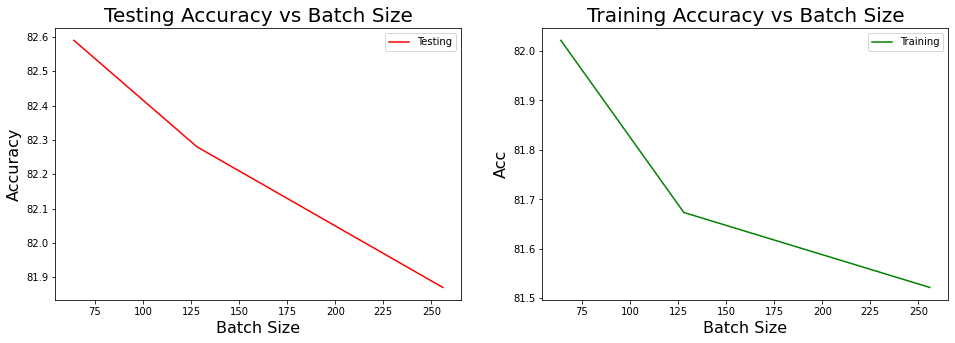

In [70]:
    fig = plt.figure(figsize = (16, 5)) 
    #plt.title("Learning Rate = 0.1",  fontsize = 20,fontname="Times New Roman Bold")
    plt.subplot(121)
    plt.plot(batches, TestAcc,'r-',label='Testing') 
    plt.legend()
    plt.title("Testing Accuracy vs Batch Size", fontsize = 20,fontname="Times New Roman Bold")
    plt.xlabel('Batch Size', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 16)
    
    plt.subplot(122)
    plt.plot(batches,TrainAcc,'g-',label='Training') 
    plt.legend()
    plt.title("Training Accuracy vs Batch Size", fontsize = 20,fontname="Times New Roman Bold")
    plt.xlabel('Batch Size',fontsize = 16)
    plt.ylabel('Acc', fontsize = 16)

In [ ]:
##### Question 6a) Conclusion

Question 6a) From the Graph Plotted above, it is evident that a lower Batch Size gives us a better Training and Testing Accuracy. Hence a smaller Batch Size say Batch size = 64 is the Optimal One 

# **Question 6 B** :Deciding Learning Rate

In [11]:
learning_rate1 = 0.025
learning_rate2 = 0.05
learning_rate3 = 0.1
learning_rate4 = 0.2
learning_rate5 =  0.5

LearningRateOptions = [learning_rate1, learning_rate2, learning_rate3, learning_rate4, learning_rate5]

In [20]:
  
def Train50Epochs(learning_rate, batch_size, train_loader):
    """
    We take the LearningRate and Batch size hyperparameters in this function and train the Neural Ntework for 50 Epochs
    We return the losses and other Model specifications

    """

    input_size = 784
    hidden_size = 100
    output_size = 10
    model = FullyConnected(input_size, hidden_size, output_size).to(device)
    loss = nn.CrossEntropyLoss()
    optimizer = optim.SGD( model.parameters(), lr = learning_rate,  momentum=0.9 )
    EPOCHS = 50

    train_loss =  []
    train_acc = []
    test_acc = []

    print(" Batch Size = ", batch_size, "\n")

    for epoch in range(EPOCHS):
        

        running_loss = 0
        correct_predictions = 0
        
        for batch_index, (image_data, classes) in enumerate(train_loader):
            
            X = image_data.to(device)
            y = classes.to(device)
            
            X = X.view(X.shape[0], -1)  ## do this for the FCC part
            
            logits = model.forward(X)
            
            predictions = torch.argmax(logits, dim = 1)
            
            running_loss += loss(logits, y)
            
            #print(classes)
            correct_predictions += torch.sum(predictions == y)
            
            optimizer.zero_grad()
            
        totalLoss = running_loss/(batch_index + 1)
        
        totalLoss.backward()
        
        optimizer.step()
        
        epoch_loss = running_loss.item()/(batch_index + 1)
        epoch_acc = correct_predictions/(60000)
        
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        test_acc.append(test_accuracy(model, test_loader, 0, True).item())
        
        print("Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%".format(epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0, True).item()))

    return model, train_loss, train_acc, test_acc

In [21]:
## Here er try out the different Learning rates
TestAcc = []
TrainAcc = []

for learning_rate in LearningRateOptions:
     
     print(" Training for Learning Rate = {} \n\n\n".format(learning_rate))
     print('\n')
     model, train_loss, train_acc, test_acc = Train50Epochs(learning_rate, 64, train_loader_64)
     TestAcc.append(test_acc)
     TrainAcc.append(train_acc)

 Training for Learning Rate = 0.025 





 Batch Size =  64 

Epoch: 1 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3276.....Test Accuracy : 11.3500%
Epoch: 2 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3234.....Test Accuracy : 11.3500%
Epoch: 3 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3164.....Test Accuracy : 11.3500%
Epoch: 4 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3085.....Test Accuracy : 11.3500%
Epoch: 5 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3011.....Test Accuracy : 11.3500%
Epoch: 6 ........... Training Accuracy: 11.2367%.....Training Loss: 2.2953.....Test Accuracy : 15.1400%
Epoch: 7 ........... Training Accuracy: 14.9267%.....Training Loss: 2.2912.....Test Accuracy : 14.2300%
Epoch: 8 ........... Training Accuracy: 14.2500%.....Training Loss: 2.2886.....Test Accuracy : 12.5700%
Epoch: 9 ........... Training Accuracy: 12.7033%.....Training Loss: 2.2866.....Test Accuracy : 12.8100%
Ep

In [45]:
TestAcc = np.array(TestAcc)
TrainAcc = np.array(TrainAcc)
BestTestError = 100 - TestAcc[:, 49]
BestTrainError = 100 -  TrainAcc[:, 49]

In [72]:
LearningRateOptions

[0.025, 0.05, 0.1, 0.2, 0.5]

Text(0, 0.5, 'Test Accuracy')

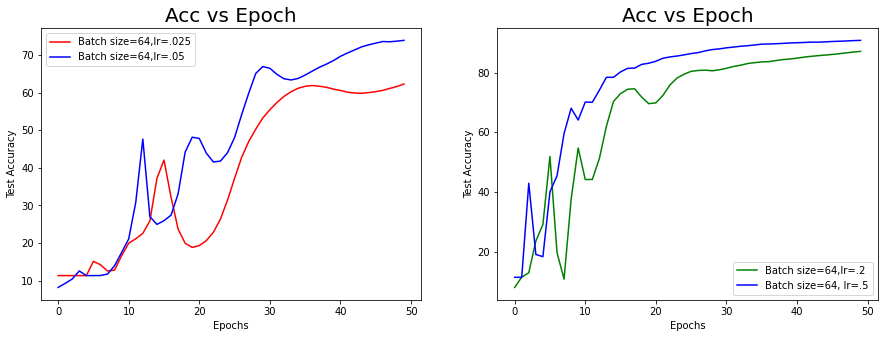

In [76]:
### Plotting the test accuracies Vs Epochs for different Learning rates
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.title("Acc vs Epoch",  fontsize = 20,fontname="Times New Roman Bold")
plt.plot(range(50),TestAcc[0, :],'r-',label='Batch size=64,lr=.025') 
plt.plot(range(50),TestAcc[1, :],'r-',color='blue',label='Batch size=64,lr=.05') 

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.subplot(122)
plt.title("Acc vs Epoch",  fontsize = 20,fontname="Times New Roman Bold")
plt.plot(range(50),TestAcc[3, :], 'g-',label='Batch size=64,lr=.2') 
plt.plot(range(50),TestAcc[4, :],'g-', color='blue',label='Batch size=64, lr=.5') 
 
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Error %')

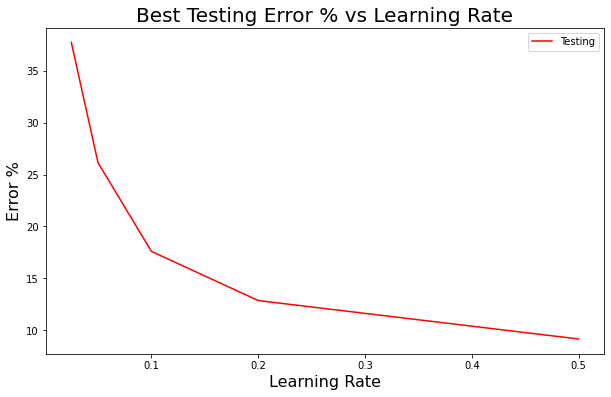

In [77]:
fig = plt.figure(figsize = (10, 6)) 
#plt.title("Learning Rate = 0.1",  fontsize = 20,fontname="Times New Roman Bold")

plt.plot(LearningRateOptions, BestTestAcc,'r-',label='Testing') 
plt.legend()
plt.title("Best Testing Error % vs Learning Rate", fontsize = 20,fontname="Times New Roman Bold")
plt.xlabel('Learning Rate', fontsize = 16)
plt.ylabel('Error %', fontsize = 16)

Question 6B) Here it is evident that if the learning rate is increased then our Testing Error decreases, hence we need to Train our model with a higher Learning Rate, i.e Learning Rate = 0.5

Conclusion: 6b) Learning Rate = 0.5 gives the best test accuarcy. So I would prefer learning rate = 0.5 for this problem

We also need to note that If the Learning Rate is lower then the convergence is slower, hence we would need to train it for more number of Epochs for lwer learning Rate. For 50 Epochs, learning rate 0.5 is the most desirable

# Question 6C: Stochastic Gradient Descent with **Restarts**

In [9]:
### The Algorithm that we use is We initialise the Learning Rate at 0.5, which gave the best Results as per 6 B)
## We train the algorithm for say 100 Epochs and after 50 for evry 10 Epochs we reduce the Learning Rate by 0.2 till 70 epochs
### Then from 70 Epochs to 100 Epochs we divide the learning Rate by 2 for every 10 epochs
## So roughly Learning rate algorithm is 


In [ ]:
Epoch no.              Learning Rate
0 - 50                 0.5
50 - 60                0.3    # -0.2
60 - 70                0.1
70 - 80                0.05   # / 2
80 - 90                0.025
90 - 100               0.0125

In [10]:
### This is the Training Cell,
## We have encoded the Learning Rate Restart in the function

input_size = 784
hidden_size = 100
output_size = 10
model = FullyConnected(input_size, hidden_size, output_size).to(device)
loss = nn.CrossEntropyLoss()

EPOCHS = 100

train_loss =  []
train_acc = []
test_acc = []

intitial_learning_rate = 0.5 ##

optimizer = optim.SGD( model.parameters(), lr = 0.5,  momentum=0.9 )
lr = intitial_learning_rate
for epoch in range(EPOCHS):
        
        if(epoch >= 50 and epoch < 70):         ## First LR restart ## Linear decrease
            lr = intitial_learning_rate - 0.02*(epoch - 50)
            optimizer = optim.SGD( model.parameters(), lr = intitial_learning_rate - 0.02*(epoch - 50),  momentum=0.9 )
        
        if(epoch >= 70 and (epoch %10) == 0):  ## More LR restart, as we go closer to 100 Eochs we make it exponential decrease instead of linear
           lr = 0.1/(2**((epoch - 60)/10))
           optimizer = optim.SGD( model.parameters(), lr = lr,  momentum=0.9 )



        running_loss = 0
        correct_predictions = 0
        
        for batch_index, (image_data, classes) in enumerate(train_loader_64):
            
            X = image_data.to(device)
            y = classes.to(device)
            
            X = X.view(X.shape[0], -1)  ## do this for the FCC part
            
            logits = model.forward(X)
            
            predictions = torch.argmax(logits, dim = 1)
            
            running_loss += loss(logits, y)
            
            #print(classes)
            correct_predictions += torch.sum(predictions == y)
            
            optimizer.zero_grad()
            
        totalLoss = running_loss/(batch_index + 1)
        
        totalLoss.backward()
        
        optimizer.step()
        
        epoch_loss = running_loss.item()/(batch_index + 1)
        epoch_acc = correct_predictions/(60000)
        
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        test_acc.append(test_accuracy(model, test_loader, 0, True).item())
        
        print("lr: {}  Epoch: {} ........... Training Accuracy: {:.4f}%.....Training Loss: {:.4f}.....Test Accuracy : {:.4f}%".format(lr, epoch + 1, epoch_acc*100, epoch_loss, test_accuracy(model, test_loader, 0, True).item()))

lr: 0.5  Epoch: 1 ........... Training Accuracy: 10.4417%.....Training Loss: 2.3632.....Test Accuracy : 11.3500%
lr: 0.5  Epoch: 2 ........... Training Accuracy: 11.2450%.....Training Loss: 2.3042.....Test Accuracy : 11.3500%
lr: 0.5  Epoch: 3 ........... Training Accuracy: 11.2367%.....Training Loss: 2.3475.....Test Accuracy : 36.3000%
lr: 0.5  Epoch: 4 ........... Training Accuracy: 35.4033%.....Training Loss: 2.2500.....Test Accuracy : 13.7300%
lr: 0.5  Epoch: 5 ........... Training Accuracy: 13.6767%.....Training Loss: 2.2143.....Test Accuracy : 11.9800%
lr: 0.5  Epoch: 6 ........... Training Accuracy: 11.8917%.....Training Loss: 2.1769.....Test Accuracy : 43.7600%
lr: 0.5  Epoch: 7 ........... Training Accuracy: 42.1650%.....Training Loss: 2.0612.....Test Accuracy : 38.5500%
lr: 0.5  Epoch: 8 ........... Training Accuracy: 36.7700%.....Training Loss: 2.0096.....Test Accuracy : 57.8500%
lr: 0.5  Epoch: 9 ........... Training Accuracy: 56.7983%.....Training Loss: 1.8732.....Test Acc

In [71]:
test_acc = np.array(train_acc)

In [16]:
lr = []          ## We keep LR constant, then decrease linearly, then exponentially ## One expt, this gave best results
for i in range(50):
  lr.append(0.5)
for i in range(50, 70):
  lr.append(0.5 - 0.02*(i - 50) )

for i in range(70, 100):
  lr.append(0.1/(2**((i - 60)/10)))

The following Cell shows How I varied the Learning Rate with Epochs

Text(0, 0.5, 'Learning Rate')

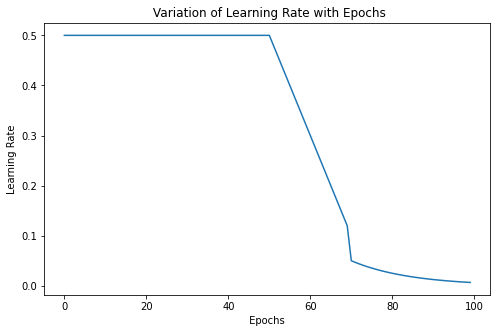

In [19]:
plt.figure(figsize = (8, 5))
plt.plot(range(100), lr)
plt.title(" Variation of Learning Rate with Epochs")
plt.xlabel(" Epochs ")
plt.ylabel("Learning Rate")

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


Batch Size :  64


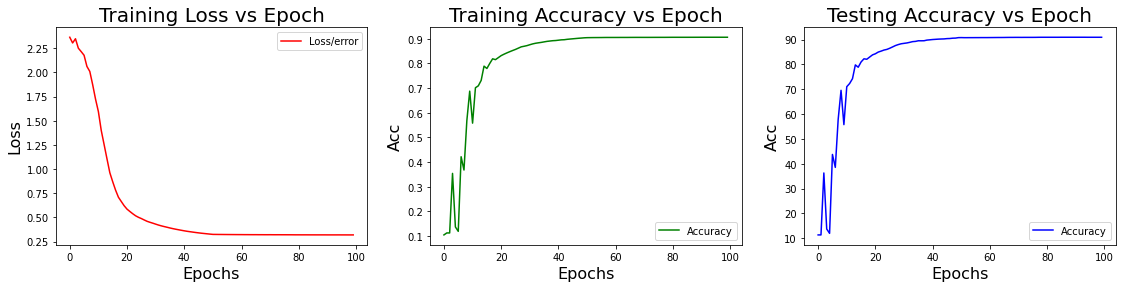

In [12]:
visualise(EPOCHS, train_loss, train_acc, test_acc, 64)

Question 6c) As we can see from how the Loss Function decreases through the EPOCHS we can see that the rate of decrease of LOSS has become slower in the Higher Epoch range. This is because our learning Rate has decreased, hence the Parameteres are changed by smaller values as the number of Epochs increases.
This is done because as we move the parameters closer to the Optimal value, we need to slow down the update otherwise we may OVERSHOOT past the optimal value. Hence we gradually decrease learning rate and allow or Algorithm to take smaller Gradient steps as we go closer to the Optimal Loss function

I came with this methodolgy of Reducing learning rate as it gave me the best among other Restart methods that I tried. It is conclusive that if we Gradually decrease learning rate, our model converges to a better optimal value of Cost and gives a better Test Accuracy. In a nutshell we take baby steps as we go closer to our Optimal value and the size of Baby steps decreases exponentially as we go closer.

A higher learning rate may cause us to Overshoot from the Minima and go past the Minimum value, this will prevent our Gradient descent from converging. Hence we need to have a smaller learning rate and decreasing the learning rate stepwise as we go closer to minima ensures a better convergence